# TextBlob Sentiment Analysis

This notebook demonstrates using TextBlob to compute sentiment polarity and subjectivity for customer reviews. TextBlob provides a simple API to extract these scores from text.

## Step 1 - Import Dependencies

Import pandas for data handling and `TextBlob` (and `Word`) from the textblob library for sentiment analysis utilities.

In [22]:
from textblob import TextBlob, Word
import pandas as pd

## Step 2 - Get Documents

Read the reviews Excel sheet into a pandas DataFrame. Calling `head()` shows the first few rows to verify the data loaded correctly.

In [23]:
reviews_df = pd.read_excel('data/reviews.xlsx')
reviews_df.head()

,Review ID,Source,Review Text
0,1,Amazon,This water filter is amazing! Setup was super ...
1,2,Amazon,"It's okay. The water tastes fine, but the app ..."
2,3,Amazon,DO NOT BUY! This thing started leaking all ove...
3,4,Amazon,Really happy with this purchase. The water qua...
4,5,Amazon,Does what it says. Water tastes alright. Not a...


## Step 3 - Define Processing Function

The `process_row` function computes two values for each review text:
- Polarity: how positive/negative the sentiment is, ranging from -1.0 (very negative) to +1.0 (very positive).
- Subjectivity: how opinionated the text is, ranging from 0.0 (very objective) to 1.0 (very subjective).

It then trims each float to two decimal places for readability and returns a tuple `(polarity, subjectivity)`.

In [25]:
def process_row(row):
    polarity = TextBlob(row['Review Text']).sentiment.polarity
    subjectivity = TextBlob(row['Review Text']).sentiment.subjectivity

    factor = 10 ** 2
    polarity_final = int(polarity * factor) / factor
    subjectivity_final = int(subjectivity * factor) / factor
    return polarity_final, subjectivity_final

## Step 4 - Results

Apply the function to each row to produce a Series of `(polarity, subjectivity)` tuples, then print the results for quick inspection.

In [26]:
results = reviews_df.apply(process_row, axis=1)
print(results)

0       (0.44, 0.6)
1       (0.02, 0.5)
2     (-0.11, 0.16)
3       (0.4, 0.77)
4      (-0.1, 0.51)
5      (0.34, 0.52)
6      (0.12, 0.59)
7      (0.37, 0.51)
8      (0.28, 0.63)
9      (0.41, 0.57)
10      (0.4, 0.56)
11    (-0.15, 0.77)
12      (0.4, 0.66)
13       (0.5, 0.5)
14     (0.28, 0.43)
15    (-0.03, 0.69)
16       (1.0, 1.0)
17     (0.47, 0.46)
18    (-0.36, 0.76)
19      (0.5, 0.62)
20    (-0.03, 0.23)
21      (0.6, 0.67)
22    (-0.07, 0.67)
23     (0.52, 0.67)
24      (1.0, 0.75)
25     (0.31, 0.61)
26      (0.1, 0.65)
27     (0.61, 0.79)
28     (0.36, 0.77)
29      (0.4, 0.35)
30     (0.02, 0.47)
31      (0.8, 0.75)
32     (0.37, 0.48)
33      (0.5, 0.55)
34      (0.3, 0.78)
35     (0.56, 0.66)
36     (0.33, 0.56)
37     (0.11, 0.43)
38     (0.07, 0.37)
39     (0.28, 0.62)
40      (0.0, 0.38)
41     (0.18, 0.32)
42      (0.2, 0.45)
43     (0.08, 0.83)
44     (0.28, 0.27)
45     (0.46, 0.66)
46     (-0.26, 0.5)
47     (0.17, 0.58)
48    (-0.97, 0.97)
49     (-0.25, 0.6)


### Notes

- TextBlob’s sentiment is rule/lexicon-based (PatternAnalyzer) and may miss context, sarcasm, or complex negations.
- Consider basic preprocessing (e.g., lowercasing, removing punctuation) if your data is noisy.
- Polarity and subjectivity are independent measures; a text can be highly subjective yet neutral in polarity.
- For more advanced handling (e.g., domain adaptation, context), consider model-based approaches.

## Step 5 - Visualization Setup

Import Matplotlib and Seaborn for plotting and set a clean style/palette for consistent visuals throughout the notebook.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
plt.style.use('ggplot')
sns.set_palette("bright")

## Step 6 - Create Columns and Labels

Unpack the `(polarity, subjectivity)` tuples into dedicated DataFrame columns. Then derive a simple sentiment label using thresholds: > 0.2 = Positive, < -0.2 = Negative, otherwise Neutral. Finally, preview the resulting columns.

In [ ]:
reviews_df['polarity'], reviews_df['subjectivity'] = zip(*results)

reviews_df['TextBlob_label'] = reviews_df['polarity'].apply(lambda x:
                                                           'Positive' if x > 0.2 else
                                                           'Negative' if x < -0.2 else
                                                           'Neutral')

reviews_df[['polarity', 'subjectivity', 'TextBlob_label']].head()


## Step 7 - Distribution Plots

Plot the distributions of polarity and subjectivity across the dataset. We use 30 bins and overlay a KDE to visualize density; a vertical line at 0 marks neutral polarity.

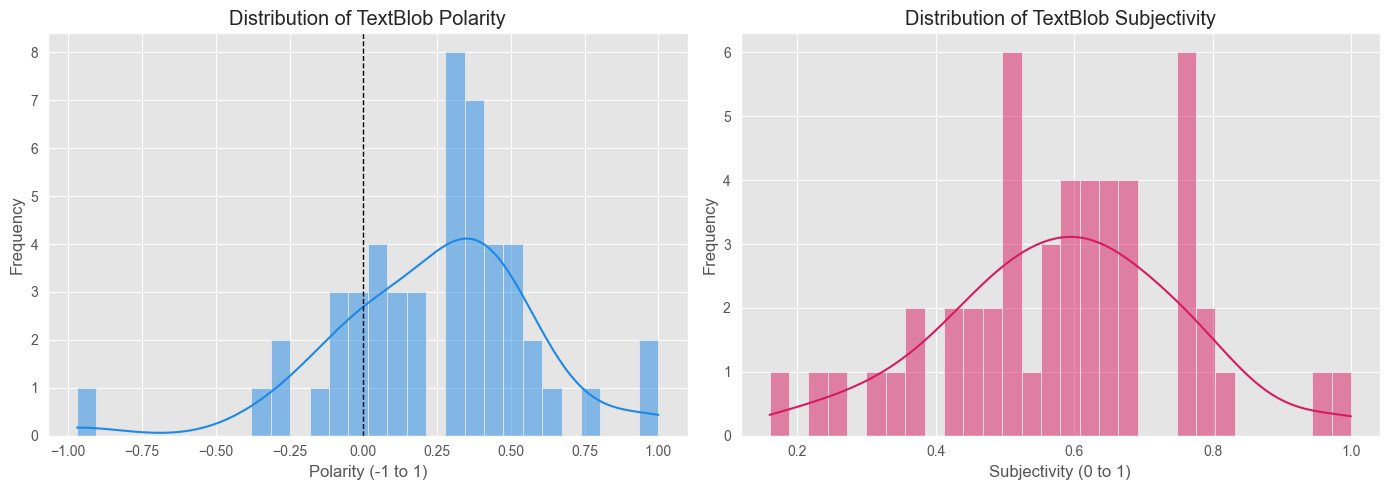

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Polarity distribution
sns.histplot(reviews_df['polarity'], bins=30, kde=True, ax=axes[0], color='#1E88E5')
axes[0].set_title('Distribution of TextBlob Polarity')
axes[0].set_xlabel('Polarity (-1 to 1)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0, color='black', linestyle='--', linewidth=1)
# Subjectivity distribution
sns.histplot(reviews_df['subjectivity'], bins=30, kde=True, ax=axes[1], color='#D81B60')
axes[1].set_title('Distribution of TextBlob Subjectivity')
axes[1].set_xlabel('Subjectivity (0 to 1)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Step 8 - Joint Distribution

Visualize the relationship between polarity and subjectivity. Each point is a review, colored by the derived sentiment label. Axis limits are set to the full possible ranges for clarity.

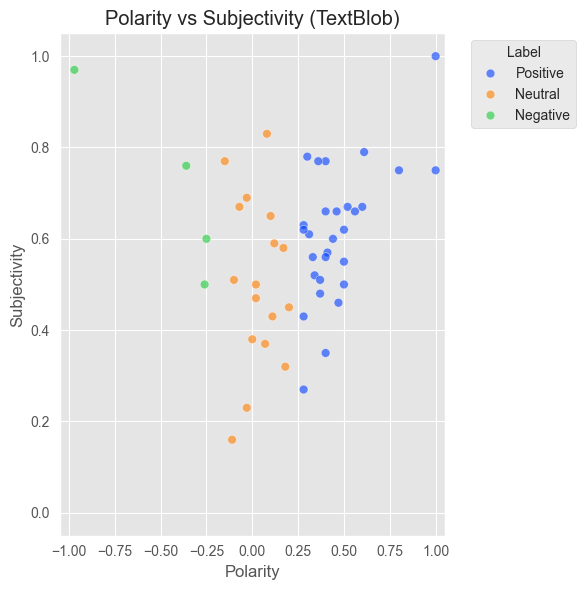

In [53]:
# Joint distribution: polarity vs subjectivity
fig, ax = plt.subplots(1, figsize=(6, 6))
sns.scatterplot(data=reviews_df, x='polarity', y='subjectivity', hue='TextBlob_label', alpha=0.6, s=40)
ax.set_title('Polarity vs Subjectivity (TextBlob)')
ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
